[Z3: z3py Namespace Reference](https://z3prover.github.io/api/html/namespacez3py.html)


In [1]:
from z3 import *

In [4]:
x = Int('x')
y = Int('y')
solve(x > 2, y < 10, x + 2*y == 7)

[y = 0, x = 7]


In [5]:
x = Int('x')
y = Int('y')

s = Solver()
s.add(x > 2)
s.add(y < 10)
s.add(x + 2 *y == 7)

In [6]:
s.check()

sat

In [7]:
s.model()

[y = 0, x = 7]

In [8]:
p = Bool("p")
my_true_thm = Implies(p, p)
my_true_thm

Implies(p, p)

In [9]:
prove(my_true_thm)

proved


In [10]:
q = Bool("q")
my_false_thm = Implies(q, p)
my_false_thm

Implies(q, p)

In [11]:
prove(my_false_thm)

counterexample
[q = True, p = False]


In [12]:
x = Bool("x")
x = Const("x" , BoolSort())
p, q, r = Bools("p q r") # convenience function for multiple definitions
x = Real("x")
y = Int("x") 
v = BitVec("n", 32) # 32 bit bitvector
f = FP("f", Float64()) #Floating point values
a = Array("a", IntSort(), BoolSort()) # arrays

In [13]:
Q(1,3)

1/3

In [19]:
IntVal(78)

78

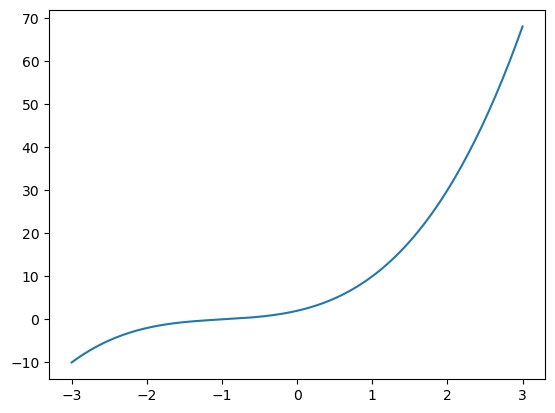

In [21]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(-3,3,200)
plt.plot(xs,xs**3 + 3*xs**2 + 4*xs + 2)
plt.show()

In [22]:
x = Real('x')
s = Solver()

In [23]:
s.add(x**3 + 3*x**2 + 4*x + 2 == 0)

In [24]:
s.check()

sat

In [26]:
m = s.model()

In [27]:
s.add(Not(x == m[x]))

In [28]:
s.check()

unsat

In [29]:
p = Real("p") # Define the z3 expression of Real constant value 3.
type(p) # What is the type of this thing
help(p) # What is the documentation. z3 has quite lovely documentation actually.
dir(p) # Does this thing have any suspicious looking functions?

Help on ArithRef in module z3.z3 object:

class ArithRef(ExprRef)
 |  ArithRef(ast, ctx=None)
 |  
 |  Integer and Real expressions.
 |  
 |  Method resolution order:
 |      ArithRef
 |      ExprRef
 |      AstRef
 |      Z3PPObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      Create the Z3 expression `self + other`.
 |      
 |      >>> x = Int('x')
 |      >>> y = Int('y')
 |      >>> x + y
 |      x + y
 |      >>> (x + y).sort()
 |      Int
 |  
 |  __div__(self, other)
 |      Create the Z3 expression `other/self`.
 |      
 |      >>> x = Int('x')
 |      >>> y = Int('y')
 |      >>> x/y
 |      x/y
 |      >>> (x/y).sort()
 |      Int
 |      >>> (x/y).sexpr()
 |      '(div x y)'
 |      >>> x = Real('x')
 |      >>> y = Real('y')
 |      >>> x/y
 |      x/y
 |      >>> (x/y).sort()
 |      Real
 |      >>> (x/y).sexpr()
 |      '(/ x y)'
 |  
 |  __ge__(self, other)
 |      Create the Z3 expression `other >= self`.
 |      
 |   

['__add__',
 '__bool__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_repr_html_',
 'arg',
 'as_ast',
 'ast',
 'children',
 'ctx',
 'ctx_ref',
 'decl',
 'eq',
 'from_string',
 'get_id',
 'hash',
 'is_int',
 'is_real',
 'num_args',
 'params',
 'serialize',
 'sexpr',
 'sort',
 'sort_kind',
 'translate',
 'use_pp']

In [30]:
x = Int('x')
y = Int('y')
print(simplify(x + y + 2*x + 3))
print(simplify(x < y + x + 2))
print(simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5))) 

3 + 3*x + y
Not(y <= -2)
And(x >= 2, 2*x**2 + y**2 >= 3)


In [31]:
digits = Ints('s e n d m o r y')
s, e, n, d, m, o, r, y = digits


In [41]:
# The word "send" stands for a number with each letter bound to a digit in 0..9
# Place values are from right to left, so "send" is really 1000*s + 100*e + 10*n + d
send = [10**(3-i) * d for i, d in enumerate([s, e, n, d])]
send_c = Sum(send)
more = [10**(3-i) * d for i,d in enumerate([m,o,r,e])]
more_c = Sum(more)
money = [10**(4-i) * d for i,d in enumerate([m,o,n,e,y])]
money_c = Sum(money)

solver = Solver()
solver.add([s > 0, m > 0])
solver.add(send_c + more_c == money_c)
solver.add([And(d >= 0, d <= 9) for d in digits])
solver.add(Distinct(digits))
solver.check()
solver.model()

[n = 6, o = 0, m = 1, r = 8, s = 9, e = 5, y = 2, d = 7]

In [42]:
# find the angles of the joints
# describe the joint positions using polynomial constraints


pos = np.array([[ Real(f"x_{(i,j)}")  for j in range(2)] for i in range(3)])
s = Solver()
s.add( np.sum(pos[0]**2) == 1 )
s.add( np.sum(pos[1]**2) == 1 )
s.add( np.sum((pos[2] - pos[0])**2) == 1 )
s.add( np.sum((pos[2] - pos[1])**2) == 1 )
s.add( pos[2][0] == 0 )
s.add( pos[2][1] == 1 )
s.check()
s.model()

[x_(0, 0) = -0.8660254037?,
 x_(1, 0) = -0.8660254037?,
 x_(0, 1) = 1/2,
 x_(1, 1) = 1/2,
 x_(2, 1) = 1,
 x_(2, 0) = 0]

Text(0.5, 1.0, 'Original Image')

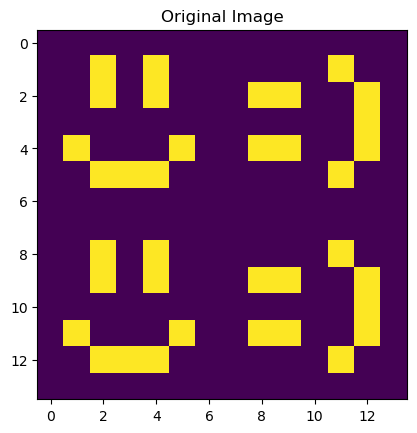

In [43]:
# Tomographic reconstruction
# integrated extinction of an x-ray beam
# data of many such lines is collected

# sums of horizontal, verticals, and diagonals
# assignment that satisfies the sums yields the image

# see Picross/Nonograms puzzles
import numpy as np
import matplotlib.pyplot as plt
bin_img = np.array([
[0,0,0,0,0,0,0],
[0,0,1,0,1,0,0],
[0,0,1,0,1,0,0],
[0,0,0,0,0,0,0],
[0,1,0,0,0,1,0],
[0,0,1,1,1,0,0],
[0,0,0,0,0,0,0]])
bin_img = np.hstack([bin_img,bin_img.T])
bin_img = np.vstack([bin_img,bin_img])
plt.imshow(bin_img)
plt.title("Original Image")


No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models
No more models


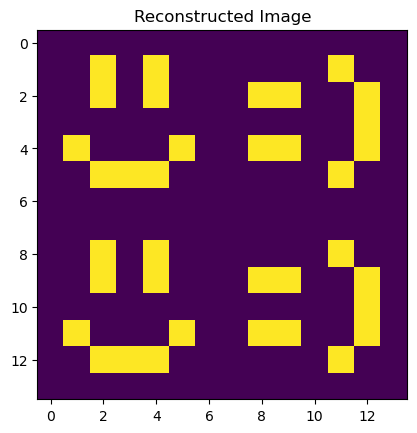

In [44]:
rows, cols = bin_img.shape
bvars = [[ If(Bool(f"x_({row},{col})"), IntVal(1),IntVal(0)) for col in range(cols)] for row in range(rows)]

s = SolverFor("QF_FD")
# for each row, column sum constraint
s.add([Sum(bvars[row]) == IntVal(int(np.sum(bin_img[row,:]))) for row in range(rows)]) 
# for each column, row sum constraint
s.add([Sum([bvars[row][col] for row in range(rows)]  ) == IntVal(int(np.sum(bin_img[:,col]))) for col in range(cols)])

# diagonal sum constraints
for diag in range(rows+cols): # Challenge mode: Can you do this more elegantly and clearly? 
    s.add(Sum([ bvars[row][col] for row in range(rows) for col in range(cols) if col + row == diag]) == IntVal(int(sum([ bin_img[row,col] for row in range(rows) for col in range(cols) if col + row == diag]))))
    s.add(Sum([ bvars[row][col] for row in range(rows) for col in range(cols) if col - row == diag - rows +1]) == IntVal(int(sum([ bin_img[row,col] for row in range(rows) for col in range(cols) if col - row == diag - rows + 1]))))
for i in range(50):  # loop through all solutions
    res = s.check()
    if res == sat:
        m = s.model()
        sol = [[m.eval(s).as_long() for s in row] for row in bvars]
        plt.figure()
        plt.imshow(sol)
        plt.title("Reconstructed Image")
        s.add(Not(And([  And([v == m.eval(v) for v in row]) for row in bvars])))
    else:
        print("No more models")